In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(f"Training set shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(f"Classes: {class_names}")
print(f"Number of classes: {len(class_names)}")
print(f"Image dimensions: {x_train.shape[1]}x{x_train.shape[2]} pixels")
print(f"Number of channels: {x_train.shape[3]} (RGB)")

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of classes: 10
Image dimensions: 32x32 pixels
Number of channels: 3 (RGB)


Visualizing CIFAR-10 Sample Images


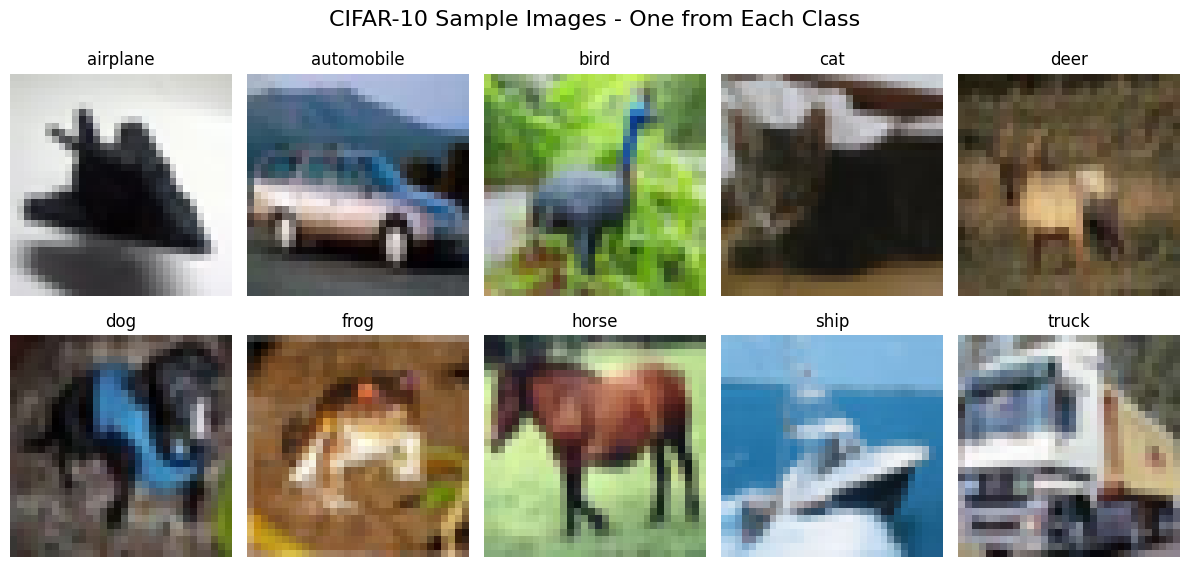

Image Properties:
Pixel value range: 0 to 255
Data type: uint8
Sample image shape: (32, 32, 3)


In [22]:
# Visualizing sample images from Each Class
import matplotlib.pyplot as plt
import numpy as np

print("Visualizing CIFAR-10 Sample Images")

# Displaying one sample from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('CIFAR-10 Sample Images - One from Each Class', fontsize=16)

for i in range(10):
    # Find first image of each class
    class_indices = np.where(y_train.flatten() == i)[0]
    sample_idx = class_indices[0]
    
    # Get the image
    sample_image = x_train[sample_idx]
    
    # Plot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(sample_image)
    axes[row, col].set_title(f'{class_names[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Print some basic info about the images
print(f"Image Properties:")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"Data type: {x_train.dtype}")
print(f"Sample image shape: {x_train[0].shape}")

CIFAR-10 Class Distribution Analysis
Training set distribution:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images

Test set distribution:
airplane: 1000 images
automobile: 1000 images
bird: 1000 images
cat: 1000 images
deer: 1000 images
dog: 1000 images
frog: 1000 images
horse: 1000 images
ship: 1000 images
truck: 1000 images


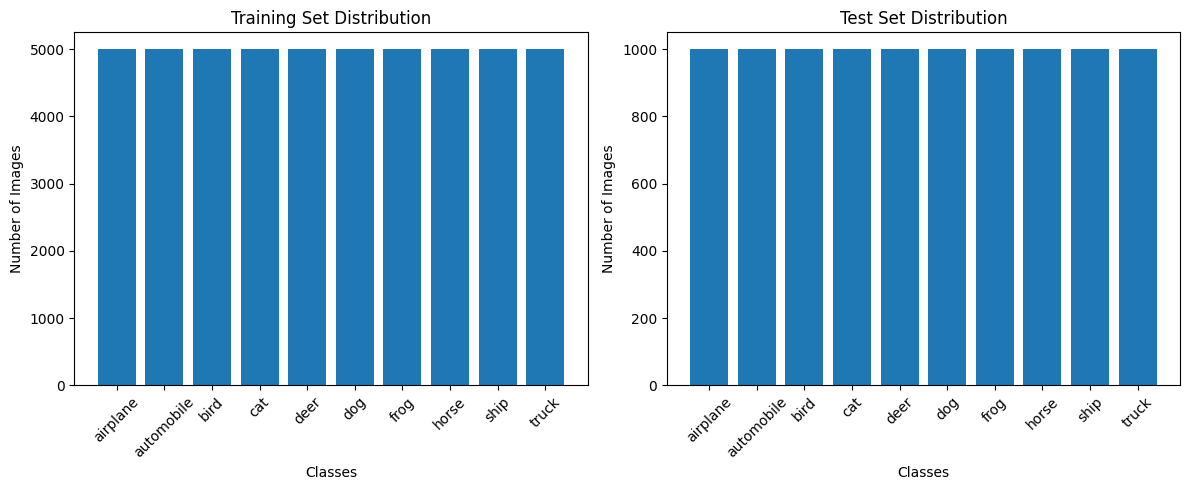

Balance Analysis:
All training classes have same count: True
All test classes have same count: True
CIFAR-10 is perfectly balanced!


In [23]:
# Checking Class Distribution
print("CIFAR-10 Class Distribution Analysis")

# Count samples per class in training set
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))

print("Training set distribution:")
for class_id, count in train_distribution.items():
    print(f"{class_names[class_id]}: {count} images")

# Count samples per class in test set  
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique_test, counts_test))

print("\nTest set distribution:")
for class_id, count in test_distribution.items():
    print(f"{class_names[class_id]}: {count} images")

# Visualize the distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
ax1.bar(range(len(class_names)), [train_distribution[i] for i in range(10)])
ax1.set_title('Training Set Distribution')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.set_xticks(range(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45)

# Test set distribution
ax2.bar(range(len(class_names)), [test_distribution[i] for i in range(10)])
ax2.set_title('Test Set Distribution')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.set_xticks(range(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45)

plt.tight_layout()
plt.show()

# Check if balanced
print(f"Balance Analysis:")
print(f"All training classes have same count: {len(set(counts)) == 1}")
print(f"All test classes have same count: {len(set(counts_test)) == 1}")
print("CIFAR-10 is perfectly balanced!")

In [24]:
# Data Preprocessing
print("Data Preprocessing")

# Check current data properties
print("Before preprocessing:")
print(f"X_train shape: {x_train.shape}")
print(f"X_train data type: {x_train.dtype}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"Y_train shape: {y_train.shape}")

# Normalize pixel values from [0, 255] to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("\nAfter normalization:")
print(f"X_train data type: {x_train_normalized.dtype}")
print(f"Pixel value range: {x_train_normalized.min():.3f} to {x_train_normalized.max():.3f}")

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"\nLabel conversion:")
print(f"Original label shape: {y_train.shape}")
print(f"Categorical label shape: {y_train_categorical.shape}")
print(f"Original label example: {y_train[0]}")
print(f"Categorical label example: {y_train_categorical[0]}")

print("Preprocessing complete!")
print("Ready for model training!")

Data Preprocessing
Before preprocessing:
X_train shape: (50000, 32, 32, 3)
X_train data type: uint8
Pixel value range: 0 to 255
Y_train shape: (50000, 1)

After normalization:
X_train data type: float32
Pixel value range: 0.000 to 1.000

Label conversion:
Original label shape: (50000, 1)
Categorical label shape: (50000, 10)
Original label example: [6]
Categorical label example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Preprocessing complete!
Ready for model training!


In [26]:
# Building and Training Baseline Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

print("Building Baseline Model - Simple Neural Network")

# Create a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten 32x32x3 images to 1D
    Dense(512, activation='relu'),      # First hidden layer
    Dropout(0.3),                       # Prevent overfitting
    Dense(256, activation='relu'),      # Second hidden layer  
    Dropout(0.3),                       # Prevent overfitting
    Dense(10, activation='softmax')     # Output layer (10 classes)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("Model Architecture:")
model.summary()

print(f"\nTotal parameters: {model.count_params():,}")
print("Model ready for training!")

Building Baseline Model - Simple Neural Network
Model Architecture:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 1,707,274
Model ready for training!


In [27]:
# Training Baseline Model
print("Training Baseline Model")

# Quick test with a small subset
print("Quick test with 1,000 samples...")

# Small subset for quick testing
x_train_small = x_train_normalized[:1000]
y_train_small = y_train_categorical[:1000]
x_val_small = x_test_normalized[:200]
y_val_small = y_test_categorical[:200]

print(f"Training on: {x_train_small.shape[0]} samples")
print(f"Validating on: {x_val_small.shape[0]} samples")

# Training for 3 epochs to test
history = model.fit(
    x_train_small, y_train_small,
    batch_size=32,
    epochs=3,
    validation_data=(x_val_small, y_val_small),
    verbose=1
)

print("Quick training test completed!")
print("Model can train successfully!")

# Check the results
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"\nQuick test results:")
print(f"Final training accuracy: {train_accuracy:.4f}")
print(f"Final validation accuracy: {val_accuracy:.4f}")

if val_accuracy > 0.15:  # Better than random guessing (10%)
    print("Model is learning! Ready for full training.")
else:
    print("Model might need adjustment.")

Training Baseline Model
Quick test with 1,000 samples...
Training on: 1000 samples
Validating on: 200 samples
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.1178 - loss: 3.1040 - val_accuracy: 0.1500 - val_loss: 2.2386
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.1599 - loss: 2.2452 - val_accuracy: 0.1900 - val_loss: 2.1569
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1653 - loss: 2.1931 - val_accuracy: 0.1950 - val_loss: 2.1405
Quick training test completed!
Model can train successfully!

Quick test results:
Final training accuracy: 0.1780
Final validation accuracy: 0.1950
Model is learning! Ready for full training.


In [28]:
# Full Training on Complete Dataset
print("Training on Full CIFAR-10 Dataset")

# Reset the model for fresh training
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training on full dataset:")
print(f"Training samples: {x_train_normalized.shape[0]:,}")
print(f"Test samples: {x_test_normalized.shape[0]:,}")

# Train the model
print("\nStarting training...")

history = model.fit(
    x_train_normalized, y_train_categorical,
    batch_size=128,
    epochs=10,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

print("Training completed!")

# Get final results
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Results:")
print(f"Training accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Validation accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Training loss: {final_train_loss:.4f}")
print(f"Validation loss: {final_val_loss:.4f}")

# Evaluate performance
if final_val_acc > 0.4:
    print("Excellent! Model is performing well!")
elif final_val_acc > 0.3:
    print("Good performance for a simple model!")
elif final_val_acc > 0.2:
    print("Decent baseline performance!")
else:
    print("Model needs improvement.")

Training on Full CIFAR-10 Dataset
Training on full dataset:
Training samples: 50,000
Test samples: 10,000

Starting training...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.2132 - loss: 2.1710 - val_accuracy: 0.3434 - val_loss: 1.8452
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3028 - loss: 1.9003 - val_accuracy: 0.3662 - val_loss: 1.7745
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.3269 - loss: 1.8517 - val_accuracy: 0.4073 - val_loss: 1.7075
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.3466 - loss: 1.8047 - val_accuracy: 0.3947 - val_loss: 1.6935
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.3539 - loss: 1.7814 - val_accuracy: 0.4023 - val_loss: 1.7187
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.3549 - loss: 1.7734 - val_accuracy: 0.4104 - val_loss: 1.6813
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.3641 - loss: 1.7447 - va

Visualizing Training Progress


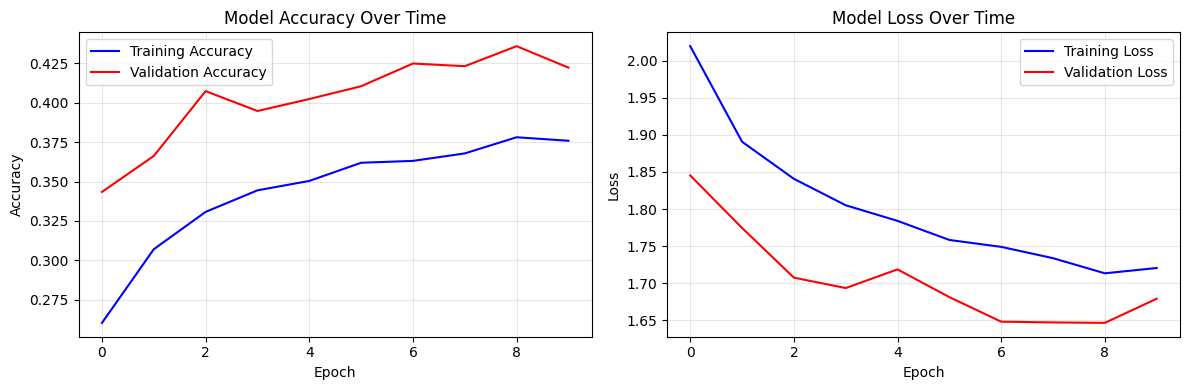

Training Summary:
Best validation accuracy: 0.4358
Final validation accuracy: 0.4222
Improvement: 0.0788
No significant overfitting detected


In [29]:
# Visualize Training Progress
import matplotlib.pyplot as plt

print("Visualizing Training Progress")

# Create plots for training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training & validation loss
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of training progress
print("Training Summary:")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Improvement: {history.history['val_accuracy'][-1] - history.history['val_accuracy'][0]:.4f}")

# Check for overfitting
final_gap = history.history['accuracy'][-1] - history.history['val_accuracy'][-1]
if abs(final_gap) < 0.05:
    print("No significant overfitting detected")
elif final_gap > 0.1:
    print("Some overfitting detected (training >> validation)")
else:
    print("Good balance between training and validation")

In [30]:
# Building Convolutional Neural Network (CNN)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

print("Building Convolutional Neural Network (CNN)")

# Build CNN model for image classification
cnn_model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Second Convolutional Block  
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    
    # Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the CNN
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display CNN architecture
print("CNN Model Architecture:")
cnn_model.summary()

print(f"\nCNN Parameters: {cnn_model.count_params():,}")
print(f"Baseline Parameters: {model.count_params():,}")
print(f"Parameter difference: {cnn_model.count_params() - model.count_params():,}")

Building Convolutional Neural Network (CNN)


c:\Users\HP4\Documents\Machine Learning with Arthur Saw\classification & regression\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Architecture:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,834 (2.81 MB)

 Trainable params: 736,362 (2.81 MB)

 Non-trainable params: 1,472 (5.75 KB)


CNN Parameters: 737,834
Baseline Parameters: 1,707,274
Parameter difference: -969,440


In [31]:
# Training the CNN Model
print("Training CNN on CIFAR-10")

# Train the CNN
cnn_history = cnn_model.fit(
    x_train_normalized, y_train_categorical,
    batch_size=128,
    epochs=15,  # More epochs for CNN
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

print("CNN Training completed!")

# Get final results
cnn_train_acc = cnn_history.history['accuracy'][-1]
cnn_val_acc = cnn_history.history['val_accuracy'][-1]
cnn_train_loss = cnn_history.history['loss'][-1]
cnn_val_loss = cnn_history.history['val_loss'][-1]

print(f"CNN Final Results:")
print(f"Training accuracy: {cnn_train_acc:.4f} ({cnn_train_acc*100:.2f}%)")
print(f"Validation accuracy: {cnn_val_acc:.4f} ({cnn_val_acc*100:.2f}%)")
print(f"Training loss: {cnn_train_loss:.4f}")
print(f"Validation loss: {cnn_val_loss:.4f}")

# Compare with baseline
baseline_val_acc = 0.422  # From previous training
improvement = cnn_val_acc - baseline_val_acc

print(f"CNN vs Baseline Comparison:")
print(f"Baseline accuracy: {baseline_val_acc:.4f} ({baseline_val_acc*100:.2f}%)")
print(f"CNN accuracy: {cnn_val_acc:.4f} ({cnn_val_acc*100:.2f}%)")
print(f"Improvement: +{improvement:.4f} (+{improvement*100:.2f} percentage points)")

if improvement > 0.15:
    print("EXCELLENT improvement")
elif improvement > 0.1:
    print("GREAT improvement!")
elif improvement > 0.05:
    print("GOOD improvement!")
else:
    print("Modest improvement")

# Performance categorization
if cnn_val_acc > 0.7:
    print("OUTSTANDING performance!")
elif cnn_val_acc > 0.6:
    print("EXCELLENT performance!")
elif cnn_val_acc > 0.5:
    print("GOOD performance!")
elif cnn_val_acc > 0.4:
    print("DECENT performance!")
else:
    print("Needs improvement")

Training CNN on CIFAR-10
Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 237ms/step - accuracy: 0.3168 - loss: 2.2595 - val_accuracy: 0.2006 - val_loss: 2.7997
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 206ms/step - accuracy: 0.5327 - loss: 1.3473 - val_accuracy: 0.5722 - val_loss: 1.2001
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.6031 - loss: 1.1120 - val_accuracy: 0.6503 - val_loss: 0.9851
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - accuracy: 0.6530 - loss: 0.9773 - val_accuracy: 0.6697 - val_loss: 0.9334
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 267ms/step - accuracy: 0.6963 - loss: 0.8679 - val_accuracy: 0.7121 - val_loss: 0.8059
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 270ms/step - accuracy: 0.7140 - loss: 0.8037 - val_accuracy: 0.7321 - val_loss: 0.7591
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.7400 - loss: 0.7470 - val_accuracy: 0.7571 - val_loss: 0.7049
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 276ms/

Model Comparison and Visualization


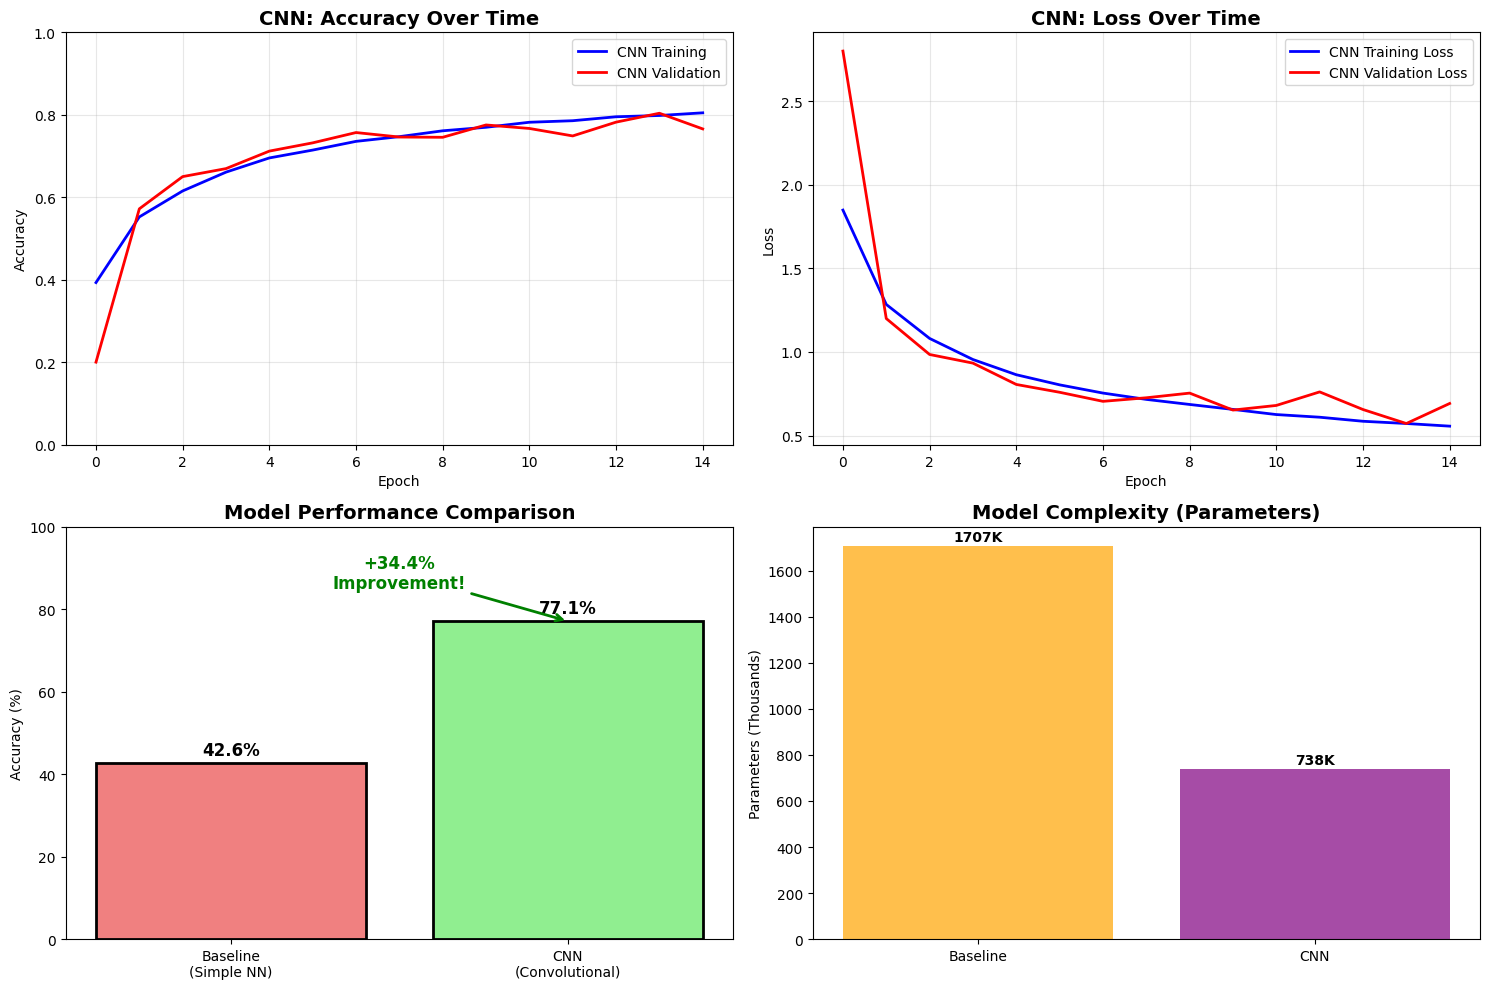

In [32]:
# Comparing Models and visualizing Results
import matplotlib.pyplot as plt
import numpy as np

print("Model Comparison and Visualization")

# Plot training history comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# CNN Training Progress
ax1.plot(cnn_history.history['accuracy'], label='CNN Training', color='blue', linewidth=2)
ax1.plot(cnn_history.history['val_accuracy'], label='CNN Validation', color='red', linewidth=2)
ax1.set_title('CNN: Accuracy Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# CNN Loss Progress  
ax2.plot(cnn_history.history['loss'], label='CNN Training Loss', color='blue', linewidth=2)
ax2.plot(cnn_history.history['val_loss'], label='CNN Validation Loss', color='red', linewidth=2)
ax2.set_title('CNN: Loss Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Model Comparison Bar Chart
models = ['Baseline\n(Simple NN)', 'CNN\n(Convolutional)']
accuracies = [42.64, 77.06]
colors = ['lightcoral', 'lightgreen']

bars = ax3.bar(models, accuracies, color=colors, edgecolor='black', linewidth=2)
ax3.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax3.set_ylabel('Accuracy (%)')
ax3.set_ylim(0, 100)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Improvement visualization
improvement = 77.06 - 42.64
ax3.annotate(f'+{improvement:.1f}%\nImprovement!', 
             xy=(1, 77.06), xytext=(0.5, 85),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=12, ha='center', color='green', fontweight='bold')

# Model Parameters Comparison
param_baseline = 1707274
param_cnn = 737834
models_param = ['Baseline', 'CNN']
params = [param_baseline/1000, param_cnn/1000]  # Convert to thousands

bars2 = ax4.bar(models_param, params, color=['orange', 'purple'], alpha=0.7)
ax4.set_title('Model Complexity (Parameters)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Parameters (Thousands)')

# Add value labels
for bar, param in zip(bars2, params):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{param:.0f}K', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [33]:
# Saving the trained CNN model

try:
    print(f"Model type: {type(cnn_model)}")
    print(f"Model input shape: {cnn_model.input_shape}")
    print(f"Model output shape: {cnn_model.output_shape}")
    print("Model verified successfully!")
except:
    print("Error: cnn_model not found. Make sure you've trained the model first.")
    exit()

# Save the complete model
try:
    cnn_model.save('cifar10_cnn_model.h5')
    print("Complete model saved as 'cifar10_cnn_model.h5'")
except Exception as e:
    print(f"Error saving complete model: {e}")

# Save the weights
try:
    cnn_model.save_weights('cifar10_cnn_weights.h5')
    print("Model weights saved as 'cifar10_cnn_weights.h5'")
except Exception as e:
    print(f"Error saving weights: {e}")

# Save model architecture as JSON (optional, for reference)
try:
    model_json = cnn_model.to_json()
    with open('cifar10_cnn_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    print("Model architecture saved as 'cifar10_cnn_architecture.json'")
except Exception as e:
    print(f"Warning: Could not save architecture: {e}")

# Verify saved files
import os
print("Checking saved files:")

files_to_check = [
    'cifar10_cnn_model.h5',
    'cifar10_cnn_weights.h5',
    'cifar10_cnn_architecture.json'
]

for filename in files_to_check:
    if os.path.exists(filename):
        file_size = os.path.getsize(filename) / (1024*1024)  # Convert to MB
        print(f"{filename}: {file_size:.2f} MB")
    else:
        print(f"{filename}: Not found")


Model type: <class 'keras.src.models.sequential.Sequential'>
Model input shape: (None, 32, 32, 3)
Model output shape: (None, 10)
Model verified successfully!
Complete model saved as 'cifar10_cnn_model.h5'
Error saving weights: The filename must end in `.weights.h5`. Received: filepath=cifar10_cnn_weights.h5
Model architecture saved as 'cifar10_cnn_architecture.json'
Checking saved files:
cifar10_cnn_model.h5: 8.53 MB
cifar10_cnn_weights.h5: Not found
cifar10_cnn_architecture.json: 0.01 MB


In [35]:
# Fixing the weights filename 

try:
    cnn_model.save_weights('cifar10_cnn.weights.h5')
    print("weights saved as 'cifar10_cnn.weights.h5'")
except Exception as e:
    print(f"Error saving weights: {e}")

# Save in modern Keras format
try:
    cnn_model.save('cifar10_cnn_model.keras')
    print("Modern Keras model saved as 'cifar10_cnn_model.keras'")
except Exception as e:
    print(f"Error saving modern format: {e}")

# Final file check
import os
print("All saved model files:")

files_to_check = [
    'cifar10_cnn_model.h5',        # Legacy format
    'cifar10_cnn_model.keras',     # Modern format  
    'cifar10_cnn.weights.h5',      # Weights only
    'cifar10_cnn_architecture.json' # Architecture
]

total_size = 0
for filename in files_to_check:
    if os.path.exists(filename):
        file_size = os.path.getsize(filename) / (1024*1024)  # MB
        total_size += file_size
        print(f"{filename}: {file_size:.2f} MB")
    else:
        print(f"{filename}: Not found")

print(f"Total model files size: {total_size:.2f} MB")

weights saved as 'cifar10_cnn.weights.h5'
Modern Keras model saved as 'cifar10_cnn_model.keras'
All saved model files:
cifar10_cnn_model.h5: 8.53 MB
cifar10_cnn_model.keras: 8.51 MB
cifar10_cnn.weights.h5: 8.50 MB
cifar10_cnn_architecture.json: 0.01 MB
Total model files size: 25.56 MB
